## Importing Libraries

In [1]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Data Exploration

In [2]:
import pandas as pd
import glob
# reading all files
df_list = [pd.read_parquet(filename) for filename in glob.glob('data/*.parquet')] 
df = pd.concat(df_list , axis = 0)
df.reset_index(drop=True , inplace=True)

In [3]:
df.head()

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,NaN,B00009
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,NaN,NaN,NaN,B00009
2,B00013,2021-01-01 00:01:00,2021-01-01 01:51:00,NaN,NaN,NaN,B00013
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,NaN,72.000,NaN,B00037
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,NaN,61.000,NaN,B00037


In [4]:
df.dtypes

dispatching_base_num              object
pickup_datetime           datetime64[ns]
dropOff_datetime          datetime64[ns]
PUlocationID                     float64
DOlocationID                     float64
SR_Flag                          float64
Affiliated_base_number            object
dtype: object

In [5]:
print(f'Total number of records : {len(df)}')
print(f'Total number of records in the month of january : {len(df_list[0])}')
print(f'Total number of records in the month of February : {len(df_list[1])}')

Total number of records : 2191804
Total number of records in the month of january : 1154112
Total number of records in the month of February : 1037692


### What's the average trip duration in January?

In [6]:
from datetime import timedelta
train_df = df_list[0].copy()
train_df['duration'] =(train_df['dropOff_datetime'] - train_df['pickup_datetime']).apply( lambda x : round(x.total_seconds()/60 , 2)).copy()
print(f"Avg trip Duration in Minutes : { round(train_df['duration'].sum()/len(train_df) , 2) }")

Avg trip Duration in Minutes : 19.17


In [7]:
train_df

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,duration
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,NaN,B00009,17.000
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,NaN,NaN,NaN,B00009,17.000
2,B00013,2021-01-01 00:01:00,2021-01-01 01:51:00,NaN,NaN,NaN,B00013,110.000
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,NaN,72.000,NaN,B00037,8.280
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,NaN,61.000,NaN,B00037,15.220
...,...,...,...,...,...,...,...,...
1154107,B03266,2021-01-31 23:43:03,2021-01-31 23:51:48,7.000,7.000,NaN,B03266,8.750
1154108,B03284,2021-01-31 23:50:27,2021-02-01 00:48:03,44.000,91.000,NaN,,57.600
1154109,B03285,2021-01-31 23:13:46,2021-01-31 23:29:58,171.000,171.000,NaN,B03285,16.200
1154110,B03285,2021-01-31 23:58:03,2021-02-01 00:17:29,15.000,15.000,NaN,B03285,19.430


In [8]:
# for januray only
from datetime import timedelta
train_df['duration'] =(train_df['dropOff_datetime'] - train_df['pickup_datetime']).apply( lambda x : round(x.total_seconds()/60 , 2))
print(f"Avg trip Duration in Minutes : { round(train_df['duration'].sum()/len(train_df) , 2) }")

Avg trip Duration in Minutes : 19.17


In [9]:
train_df['duration'].describe(percentiles = [.95 , .98 , .99])

count   1154112.000
mean         19.167
std         398.692
min           0.020
50%          13.400
95%          47.250
98%          66.130
99%          90.300
max      423371.050
Name: duration, dtype: float64

In [10]:
IQR = train_df['duration'].quantile(.75)  - train_df['duration'].quantile(.25)
upper_Q , lower_Q = (IQR * 1.5) + train_df['duration'].quantile(.75) , (IQR * 1.5) - train_df['duration'].quantile(.25)

In [11]:
upper_Q , lower_Q

(44.045, 13.995000000000001)

In [12]:
# selecting duration between 1 to 60
train_df = train_df[(train_df['duration'] >1) & (train_df['duration'] < 60 )]

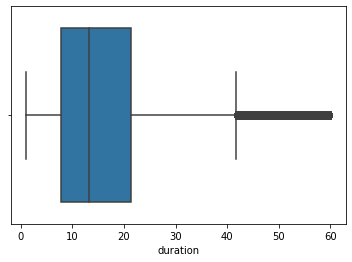

In [13]:
import seaborn as sns
ax = sns.boxplot(x=train_df["duration"])

/home/ubuntu/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


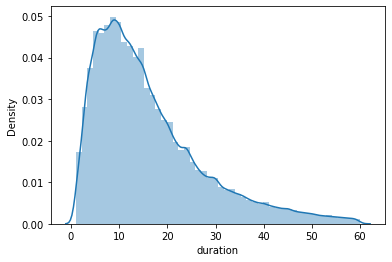

In [14]:
ax= sns.distplot(train_df['duration'])

### What's the fractions of missing values for the pickup location ID? I.e. fraction of "-1"s after you filled the NAs.



In [15]:
train_df.columns

Index(['dispatching_base_num', 'pickup_datetime', 'dropOff_datetime',
       'PUlocationID', 'DOlocationID', 'SR_Flag', 'Affiliated_base_number',
       'duration'],
      dtype='object')

In [16]:
data = train_df.copy()
data.fillna(-1 , inplace=True)


In [17]:
# Total Nan values
print(f'ratio of PUlocationID : {round((data.PUlocationID == -1 ).sum()/len(data) * 100 , 2) } %')

ratio of PUlocationID : 83.63 %


### Apply One hot encoding to Pickup and Dropoff location ID

In [18]:
data.columns

Index(['dispatching_base_num', 'pickup_datetime', 'dropOff_datetime',
       'PUlocationID', 'DOlocationID', 'SR_Flag', 'Affiliated_base_number',
       'duration'],
      dtype='object')

In [26]:
data_2 = data[['PUlocationID' ,'DOlocationID']]

In [27]:
data_2 = data_2.astype(str)
df_dict = data_2.to_dict('records')

### Trainning a model

In [28]:
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [29]:
from sklearn.feature_extraction import DictVectorizer
import numpy as np
# df_dict
y = np.array(data['duration'])
v = DictVectorizer()
X = v.fit_transform(df_dict)

In [30]:
X.shape

(1106890, 525)

In [31]:
# Dropping any rows with Nan values
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

regr = LinearRegression()
regr.fit(X, y)

y_pred = regr.predict(X)
rms = mean_squared_error(y_pred,y, squared=False)
print(f'RMS on train data : {rms}')

RMS on train data : 10.387905375178105


## validate a model

In [32]:
from datetime import timedelta
val_df = df_list[1].copy()
val_df.fillna(-1 , inplace= True)
val_df['duration'] =(val_df['dropOff_datetime'] - val_df['pickup_datetime']).apply( lambda x : round(x.total_seconds()/60 , 2))
# Select subset , remove outliers
val_df = val_df[(val_df['duration'] >1) & (val_df['duration'] < 60 )]

y = val_df['duration'].values
copy_df = val_df[['PUlocationID' , 'DOlocationID']]
copy_df=copy_df.astype(str)

val_df_dict = copy_df.to_dict('records')

val_X = v.transform(val_df_dict)

In [35]:
val_X.shape

(987770, 525)

In [36]:
from sklearn.metrics import mean_squared_error

y_pred = regr.predict(val_X)
rms = mean_squared_error(y,y_pred, squared=False)
print(f'RMS on val data : {rms}')

RMS on val data : 10.897036793545478
